In [1]:
#The final Draft

import csv
import pandas as pd
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pylab as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
movies_df = pd.read_csv('./MoviesOnStreamingPlatforms.csv')
movies_df.head(10)
movies_df=movies_df.iloc[:, 1:].set_index('ID')
movies_df.head(5)



,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,
1,The Irishman,2019,18+,98/100,1,0,0,0,0
2,Dangal,2016,7+,97/100,1,0,0,0,0
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
5,Roma,2018,18+,94/100,1,0,0,0,0


In [3]:
movies_df.value_counts()


Title                Year  Age  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type
#FriendButMarried 2  2020  16+  47/100           1        0     0            0        0       1
Shadow Company       2006  13+  44/100           0        0     1            0        0       1
Shaandaar            2015  13+  45/100           1        0     0            0        0       1
Sextuplets           2019  16+  55/100           1        0     0            0        0       1
Sex Drive            2008  18+  70/100           1        0     0            0        0       1
                                                                                             ..
Happy Hour           2003  16+  43/100           0        0     1            0        0       1
Happy Birthday       2016  18+  50/100           0        0     1            0        0       1
Happy Anniversary    2018  18+  55/100           1        0     0            0        0       1
Happiest Season      2020  13+  83/100       

In [4]:
#movies_df['platform']=''
#for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']: 
   # movies_df.loc[movies_df[each_platform]==1, 'platform']=each_platform

movies_df['Streaming platform']=''
for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']: 
    movies_df.loc[movies_df[each_platform]==1, 'Streaming platform']=each_platform    
    

#### Next we look for the Streaming platform that provides the highest number of critically acclaimed movies.

In [5]:
movies_df['Streaming platform'].value_counts()


Prime Video    4100
Netflix        3550
Hulu            943
Disney+         922
Name: Streaming platform, dtype: int64

In [6]:
#Split Rotten Tomatoes column in to two different cells.
data=movies_df['Rotten Tomatoes'].str.split('/', expand=True)

In [7]:
#Add the split value into a new column called rating and convert the values to float.
movies_df['Rating']=pd.to_numeric(data[0])
movies_df

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Streaming platform,Rating
ID,,,,,,,,,,,
1,The Irishman,2019,18+,98/100,1,0,0,0,0,Netflix,98.0
2,Dangal,2016,7+,97/100,1,0,0,0,0,Netflix,97.0
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0,Netflix,95.0
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0,Netflix,94.0
5,Roma,2018,18+,94/100,1,0,0,0,0,Netflix,94.0
...,...,...,...,...,...,...,...,...,...,...,...
9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0,Disney+,14.0
9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0,Disney+,13.0
9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0,Disney+,13.0


In [8]:
Ratings=movies_df.groupby(['Rating','Streaming platform']).count()
Ratings

Title  Year  Age  Rotten Tomatoes  Netflix  Hulu  \
Rating Streaming platform                                                     
10.0   Disney+                 2     2    1                2        2     2   
       Netflix                13    13    0               13       13    13   
12.0   Hulu                    1     1    0                1        1     1   
       Netflix                21    21    1               21       21    21   
       Prime Video             3     3    2                3        3     3   
...                          ...   ...  ...              ...      ...   ...   
94.0   Netflix                 3     3    3                3        3     3   
95.0   Netflix                 1     1    1                1        1     1   
96.0   Disney+                 1     1    1                1        1     1   
97.0   Netflix                 1     1    1                1        1     1   
98.0   Netflix                 1     1    1                1        1     1   

                           Prime Video  Disney+  Type  
Rating Streaming platform                              
10.0   Disney+                       2        2     2  
       Netflix                      13       13    13  
12.0   Hulu                          1        1     1  
       Netflix                      21       21    21  
       Prime Video                   3        3     3  
...                                ...      ...   ...  
94.0   Netflix                       3        3     3  
95.0   Netflix                       1        1     1  
96.0   Disney+                       1        1     1  
97.0   Netflix                       1        1     1  
98.0   Netflix                       1        1     1  

[281 rows x 9 columns]

In [9]:
Ratings.reset_index(inplace=True)

In [10]:
Ratings

,Rating,Streaming platform,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,10.0,Disney+,2,2,1,2,2,2,2,2,2
1,10.0,Netflix,13,13,0,13,13,13,13,13,13
2,12.0,Hulu,1,1,0,1,1,1,1,1,1
3,12.0,Netflix,21,21,1,21,21,21,21,21,21
4,12.0,Prime Video,3,3,2,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
276,94.0,Netflix,3,3,3,3,3,3,3,3,3
277,95.0,Netflix,1,1,1,1,1,1,1,1,1
278,96.0,Disney+,1,1,1,1,1,1,1,1,1
279,97.0,Netflix,1,1,1,1,1,1,1,1,1


<Figure size 1080x1080 with 0 Axes>

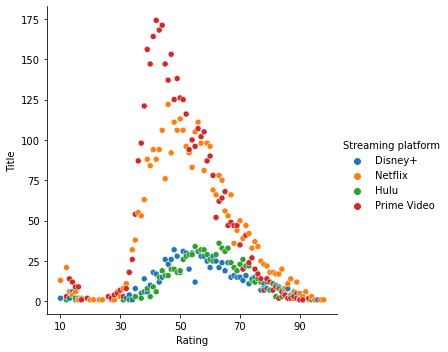

In [17]:
fig=plt.figure(figsize=(15,15))
ax = sns.relplot(x=Ratings['Rating'], y=Ratings['Title'], hue= Ratings['Streaming platform'])
#x=np.arange(20,100,20)
plt.xticks(np.arange(10,100,20))
plt.show()




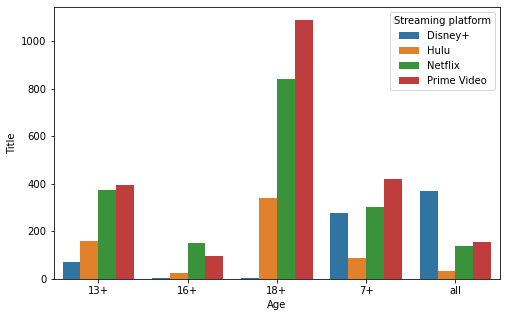

In [25]:
fig=plt.figure(figsize=(8,5))
az = sns.barplot(x=Age['Age'], y=Age['Title'], hue= Age['Streaming platform'])
#x=np.arange(20,100,20)
# plt.xticks(np.arange(10,100,20))
plt.show()



In [22]:
Age=movies_df.groupby(['Age','Streaming platform']).count()
Age.reset_index(inplace=True)
Age

,Age,Streaming platform,Title,Year,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Rating
0,13+,Disney+,70,70,70,70,70,70,70,70,70
1,13+,Hulu,161,161,161,161,161,161,161,161,161
2,13+,Netflix,372,372,372,372,372,372,372,372,372
3,13+,Prime Video,395,395,395,395,395,395,395,395,395
4,16+,Disney+,4,4,4,4,4,4,4,4,4
5,16+,Hulu,26,26,26,26,26,26,26,26,26
6,16+,Netflix,149,149,149,149,149,149,149,149,149
7,16+,Prime Video,97,97,97,97,97,97,97,97,97
8,18+,Disney+,3,3,3,3,3,3,3,3,3
9,18+,Hulu,342,342,342,342,342,342,342,342,342


In [27]:
Year=movies_df.groupby(['Age','Streaming platform','Year']).count()
Year.reset_index(inplace=True)
Year.head()

,Age,Streaming platform,Year,Title,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Rating
0,13+,Disney+,1987,1,1,1,1,1,1,1,1
1,13+,Disney+,1992,1,1,1,1,1,1,1,1
2,13+,Disney+,1996,1,1,1,1,1,1,1,1
3,13+,Disney+,1998,1,1,1,1,1,1,1,1
4,13+,Disney+,2002,1,1,1,1,1,1,1,1


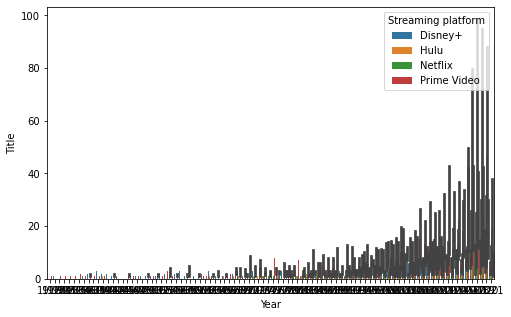

In [39]:
fig=plt.figure(figsize=(8,5))
ay = sns.barplot(x=Year['Year'], y=Year['Title'], hue= Year['Streaming platform'])
#x=np.arange(20,100,20)
#plt.xticks(np.arange(1980,2020,20))
plt.show()